In [1]:
# Import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Panggil Dataset
# Baca data pelanggan dari file CSV dan simpan dalam DataFrame.
data = pd.read_csv("Customers.csv")
df = pd.DataFrame(data)
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [3]:
# Pilih kolom Annual Income ($) dan Spending Score (1-100) sebagai atribut yang digunakan dalam clustering.
dataset = pd.read_csv('Customers.csv')
df = dataset.iloc[:, [3, 4]].values
print (df)



[[ 15000     39]
 [ 35000     81]
 [ 86000      6]
 ...
 [ 90961     14]
 [182109      4]
 [110610     52]]


In [4]:
# Konversi data ke dalam format array numpy.
X = np.asarray(df)
print("\nAnnual Income ($) VS Spending Score (1-100)")    
print(X)    


Annual Income ($) VS Spending Score (1-100)
[[ 15000     39]
 [ 35000     81]
 [ 86000      6]
 ...
 [ 90961     14]
 [182109      4]
 [110610     52]]


In [5]:
 #Buat model K-Means dengan menggunakan metode fit pada data. 
# Cetak posisi centroid yang dihasilkan oleh K-Means, yang mewakili pusat dari setiap cluster. 
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,  
    max_iter=500,
    random_state=42
)

kmeans.fit(X)
print("\nCentroid Random")
print(kmeans.cluster_centers_)



Centroid Random
[[6.62016253e+04 4.94448898e+01]
 [1.37666912e+05 5.23819742e+01]
 [2.24677419e+04 4.96935484e+01]
 [1.73022524e+05 5.10985577e+01]
 [1.00026022e+05 5.13595960e+01]]


C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


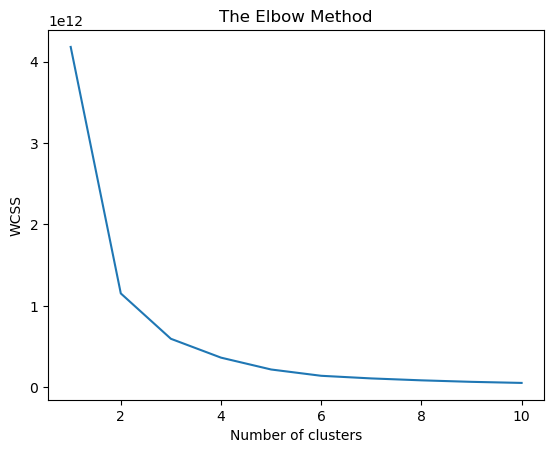

In [6]:
# Lakukan analisis / Plot grafik "Elbow Method" untuk menentukan jumlah cluster yang optimal. 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Buat ulang model K-Means dengan jumlah cluster yang optimal berdasarkan grafik "Elbow Method".
# Dan lakukan prediksi clustering menggunakan metode fit_predict pada data
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
     

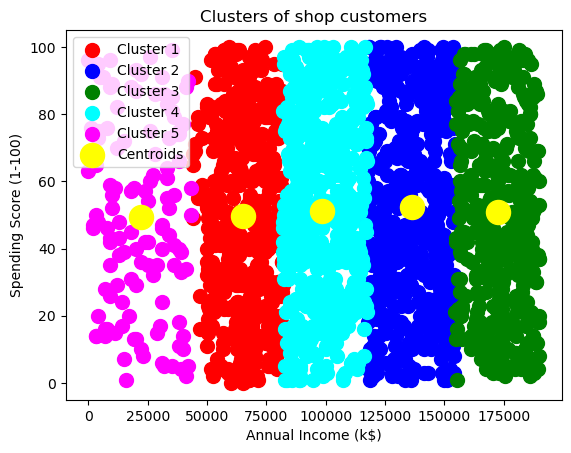

In [8]:
# Plot hasil clustering dengan memvisualisasikan data dan centroid pada grafik Annual Income (k$) vs. Spending Score (1-100). 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of shop customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [9]:
# Evaluasi clustering menggunakan metrik Davies-Bouldin Score untuk mengukur kualitas cluster yang dihasilkan.
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.49883472478651125
